In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hour.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Looking for null values

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Sanity Checks

In [6]:
df['casual'].sum()

620017

In [7]:
df['registered'].sum()

2672662

In [8]:
620017 + 2672662

3292679

In [9]:
df['cnt'].sum() # Count of Total Users = Count of (Casual + Registered) users

3292679

In [10]:
df['mnth']

0         1
1         1
2         1
3         1
4         1
         ..
17374    12
17375    12
17376    12
17377    12
17378    12
Name: mnth, Length: 17379, dtype: int64

In [11]:
np.unique(df.mnth) # No values other than 1-12

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [12]:
np.unique(df.hr) # No values other than 0-23

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
inp1 = df.drop(['instant', 'dteday', 'casual', 'registered'], axis =1) # Dropping columns

In [15]:
inp1.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
inp1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


#### Univariate Analysis

In [17]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<Axes: ylabel='Density'>

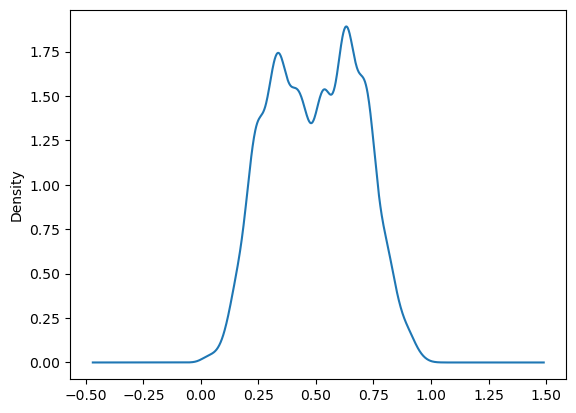

In [18]:
# Density plot for temp
inp1.temp.plot.density()

<Axes: >

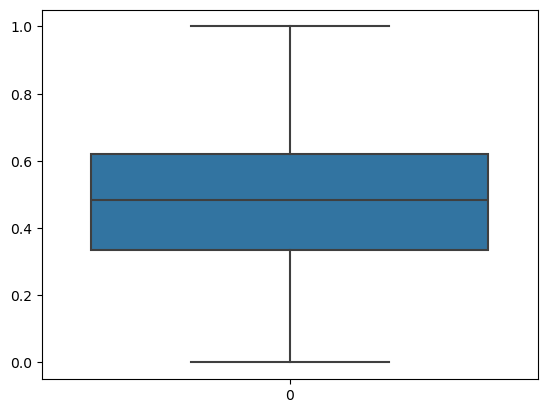

In [19]:
# Box plot for atemp
sns.boxplot(inp1.atemp) # No outliers present in the data

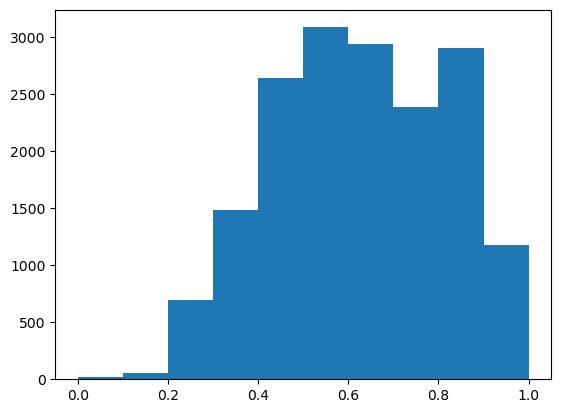

In [20]:
# Histogram for Humidity
plt.hist(inp1.hum)
plt.show()

<Axes: ylabel='Density'>

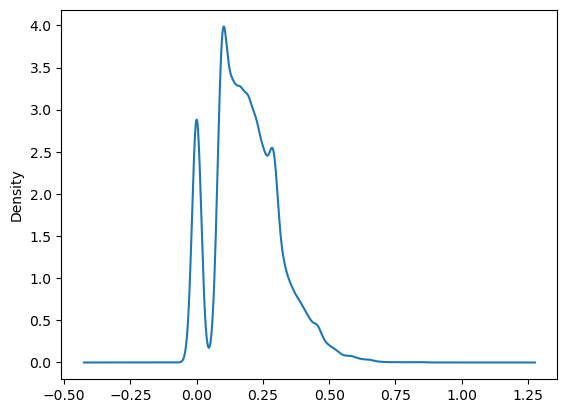

In [21]:
# Density plot for windspeed
inp1.windspeed.plot.density()

<Axes: ylabel='Density'>

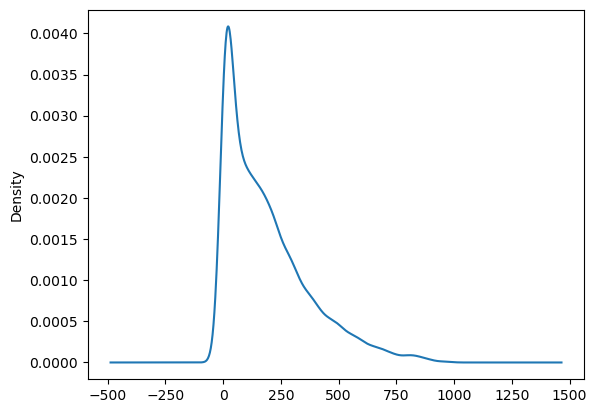

In [22]:
#Box and density plot for cnt – this is the variable of interest 

inp1.cnt.plot.density()

<Axes: >

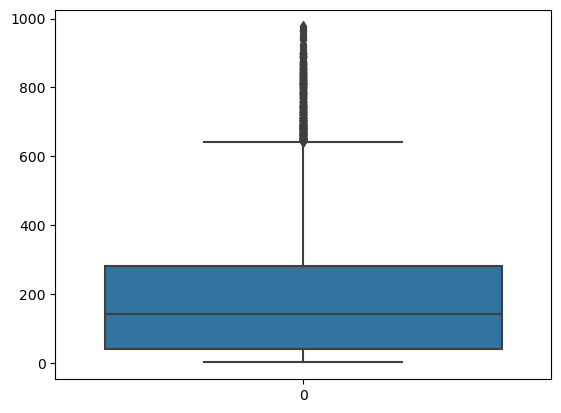

In [23]:
sns.boxplot(inp1.cnt) #There are outliers in the dataset

#### Outlier Treatment

In [24]:
inp1.cnt.quantile([0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]) # Finding the quartile values of 10, 25, 50, 75, 90, 95, 99

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [25]:
inp2 = inp1[inp1.cnt<563] # choosing the cut-off as 95% and taking only "cnt" values upto 563

In [26]:
inp2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


#### Bivariate analysis

<Figure size 1000x600 with 0 Axes>

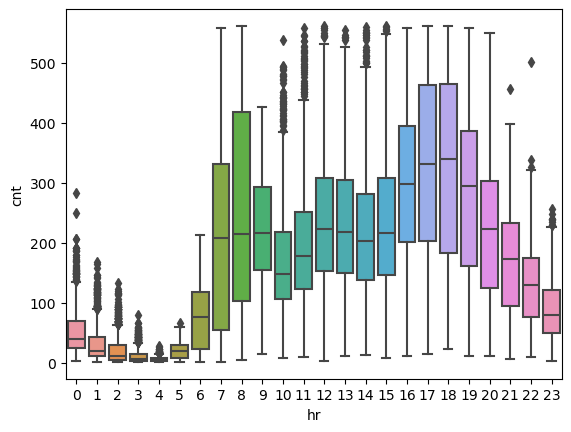

<Figure size 1000x600 with 0 Axes>

In [28]:
# Make boxplot for cnt vs. hour
sns.boxplot(x = "hr",y = "cnt", data = inp2)
plt.figure(figsize=(10,6)) # Inference: 7-9 AM and 4-6 PM accounts for most bike rentals

Almost all weekdays have the same count of bike rentals


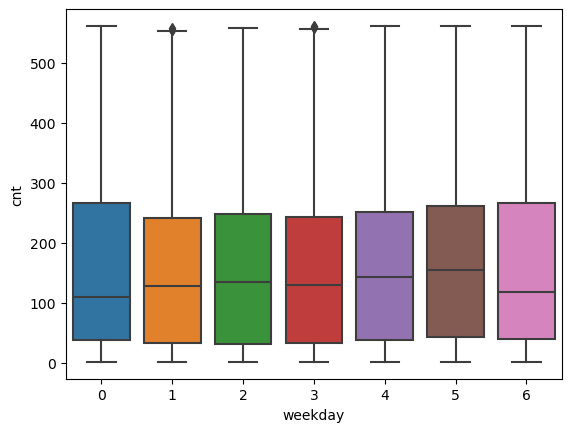

In [29]:
# Make boxplot for cnt vs. weekday
sns.boxplot(x='weekday', y='cnt', data = inp2)
print("Almost all weekdays have the same count of bike rentals")

2nd and 3rd quarters of the year have more bike rentals


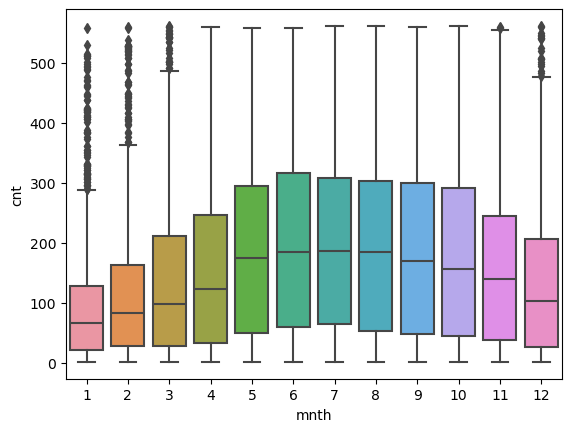

In [30]:
# Make boxplot for cnt vs. month
sns.boxplot(x='mnth', y='cnt', data = inp2)
print("2nd and 3rd quarters of the year have more bike rentals")

Fall season has higher bike rentals comparatively


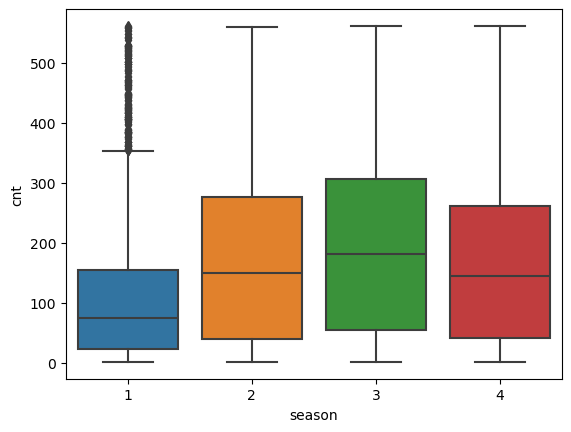

In [31]:
# Make boxplot for cnt vs. season
sns.boxplot(x='season', y='cnt', data = inp2)
print("Fall season has higher bike rentals comparatively")

In [32]:
inp2.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000
mean,2.482911,0.480669,6.499273,11.377833,0.029936,2.994304,0.679190,1.435220,0.489781,0.469456,0.633346,0.189040,163.129196
std,1.115875,0.499641,3.478831,6.998087,0.170415,2.011564,0.466802,0.645067,0.192378,0.171970,0.192207,0.122512,142.818576
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.318200,0.480000,0.104500,36.000000
50%,2.000000,0.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.640000,0.164200,130.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,253.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,562.000000


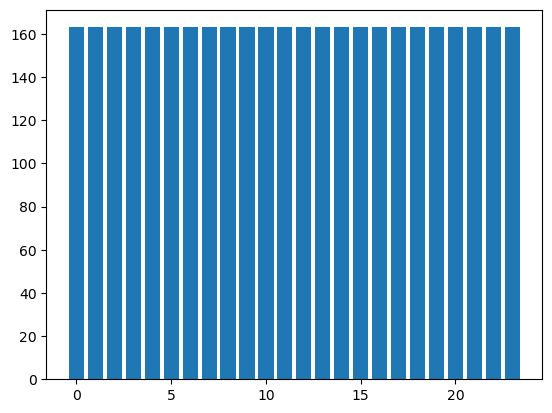

In [33]:
# Make a bar plot with the median value of cnt for each hr
x = 163.129196
plt.bar(inp2.hr, x)
plt.show() #Incorrect

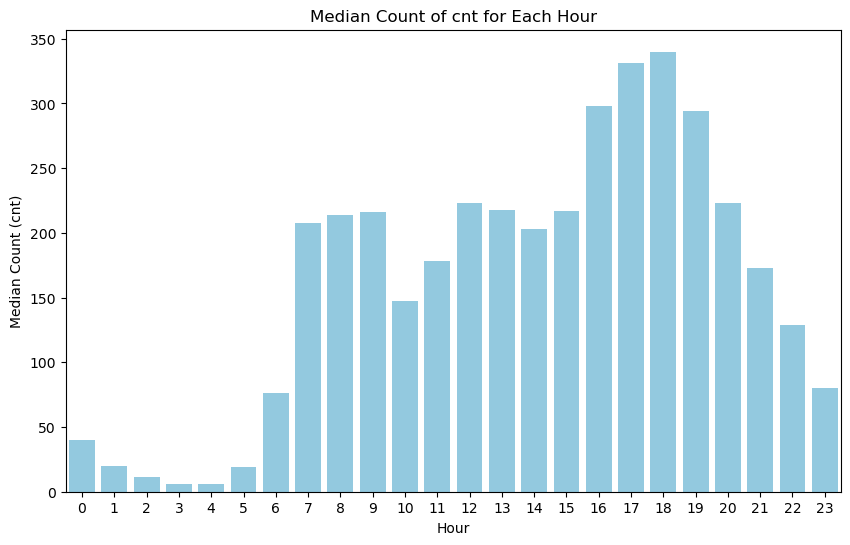

Bar Graph which shows the average rental count for each hour


In [34]:
median_by_hour = inp2.groupby('hr')['cnt'].median().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='hr', y='cnt', data=median_by_hour, color='skyblue')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Median Count (cnt)')
plt.title('Median Count of cnt for Each Hour')

# Show the plot
plt.show() 
print("Bar Graph which shows the average rental count for each hour")

In [35]:
# Make a correlation matrix for variables atemp, temp, hum, and windspeed
corr_matrix = inp2[['atemp','temp','hum','windspeed']].corr()
corr_matrix

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


In [36]:
print("temp and atemp variables have the highest correlation ")

temp and atemp variables have the highest correlation 


#### Data Pre-processing

In [37]:
#Treating mnth column
#For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.
#Get dummies for the updated 6 mnth values

inp3 = inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5

C:\Users\HP\AppData\Local\Temp\ipykernel_14668\1265151561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5


In [38]:
np.unique(inp3.mnth)

array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [39]:
#2.Treating ‘hr’ column
#Create new mapping: 0-5: 0, 11-15: 11, other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

inp3.hr[inp3.hr.isin([0,1,2,3,4,5])] = 0
inp3.hr[inp3.hr.isin([11,12,13,14,15])] = 11

C:\Users\HP\AppData\Local\Temp\ipykernel_14668\2362603208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([0,1,2,3,4,5])] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_14668\2362603208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([11,12,13,14,15])] = 11


In [40]:
np.unique(inp3.hr)

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

#### Train Test Split

In [41]:
#Apply 70-30 split.Call the new dataframes df_train and df_test

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [42]:
# Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

y_train = df_train.pop('cnt')
x_train = df_train

y_test = df_test.pop('cnt')
x_test = df_test

#### Model Building

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import r2_score
y_train_pred = lr.predict(x_train)

In [45]:
r2_score(y_train, y_train_pred)

0.41385767393843875

In [46]:
from sklearn.metrics import r2_score

In [47]:
y_test_pred = lr.predict(x_test)
r2_score(y_test, y_test_pred)

0.41186590179407456